### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

Text(0, 0.5, 'Количество хищников')

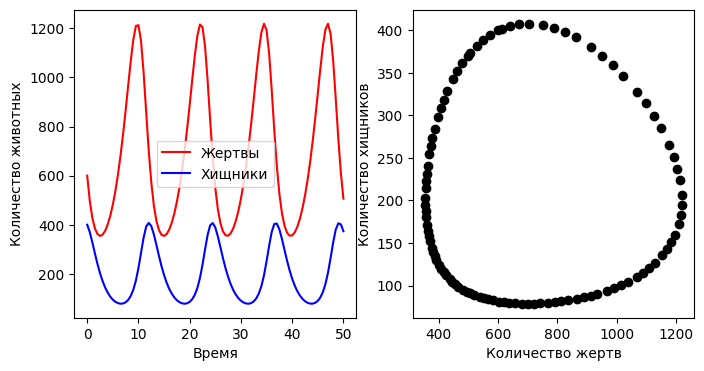

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 101)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

Слева - график зависимости популяции от времени, справа - фазовое пространство.

## Задание: 

* Сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

## Решение
Рассмотрим систему:

$\begin{cases}
x'(t) = a x - b x y,\\[4pt]
y'(t) = c x y - d y,
\end{cases}$

Стационарные точки
	1.	(0,0) — вымерли все.
	2.	Ненулевая:

$x^* = \frac{d}{c},\qquad
y^* = \frac{a}{b}.$

* Теперь линеаризуем систему(поведение рядом с равовесием):
  
$u = x - x^*,\quad v = y - y^*.$

Решаем, считаем якобиан, ищем собственные значение и тд...

В результате:

$\lambda_{1,2} = \pm i\sqrt{ad}.$

1) действательной части нет, тогда линейная система даёт чистые колебания (центр),
2) мнимая часть $\omega = \sqrt{ad}$ — это угловая частота. 

$T = \frac{2\pi}{\omega}.$

Получаем период системы

$\Delta t$ должен быть много меньше периода: где то было написано - 20–50 точек на период 

$\Delta t \lesssim T/20$ 

Рассмотрим на текущей задаче:

$\Delta t \lesssim T/20$

$T \approx \frac{2\pi}{\sqrt{ad}}.$

$\sqrt{ad} \approx 0{.}53$

$T \approx \frac{2\pi}{0{.}53} \approx 12.$

$t = np.linspace(0, 50, 101) → \Delta t = 0{.}5$  это ~24 узла на период

$\frac{12}{20}=0.6$ так что норм

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

### Часть 2. Метод высокого порядка

### Задание 1: 
Выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и четвертого порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)

### Решение

$t_n = t_0 + n h,$

* РК1

\begin{aligned}
x'(t_n) &\approx f_x(x_n, y_n),\\
y'(t_n) &\approx f_y(x_n, y_n).
\end{aligned}

\begin{aligned}
x_{n+1} &\approx x_n + h\,x'(t_n) = x_n + h\,f_x(x_n,y_n),\\
y_{n+1} &\approx y_n + h\,y'(t_n) = y_n + h\,f_y(x_n,y_n).
\end{aligned}

\begin{aligned}
x_{n+1} &= x_n + h\,(a x_n - b x_n y_n),\\[4pt]
y_{n+1} &= y_n + h\,(c x_n y_n - d y_n).
\end{aligned}

Первый порядок точности

* РК4

k₁ — наклон в начале

$k_{1x} = f_x(x_n,y_n),\quad k_{1y}=f_y(x_n,y_n)$

k₂ — наклон в середине шага “по направлению k₁”

$k_{2x}=f_x(x_n+\tfrac{h}{2}k_{1x},\ y_n+\tfrac{h}{2}k_{1y})$

k₃ — другое значение наклона в середине шага (уточнение)

$k_{3x}=f_x(x_n+\tfrac{h}{2}k_{2x},\ y_n+\tfrac{h}{2}k_{2y})$

k₄ — наклон в конце шага

$k_{4x}=f_x(x_n+h k_{3x},\ y_n+h k_{3y})$

Финальный шаг

$x_{n+1} = x_n + \frac{h}{6}(k_{1x}+2k_{2x}+2k_{3x}+k_{4x})$

$y_{n+1} = y_n + \frac{h}{6}(k_{1y}+2k_{2y}+2k_{3y}+k_{4y})$
### Задание 2: 
Решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

***ваш ответ***

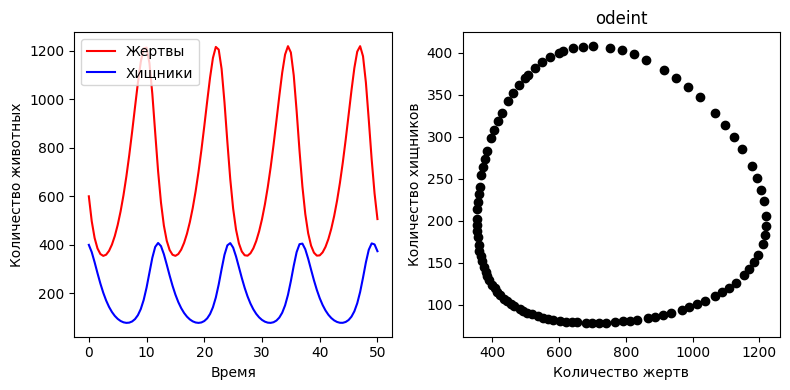

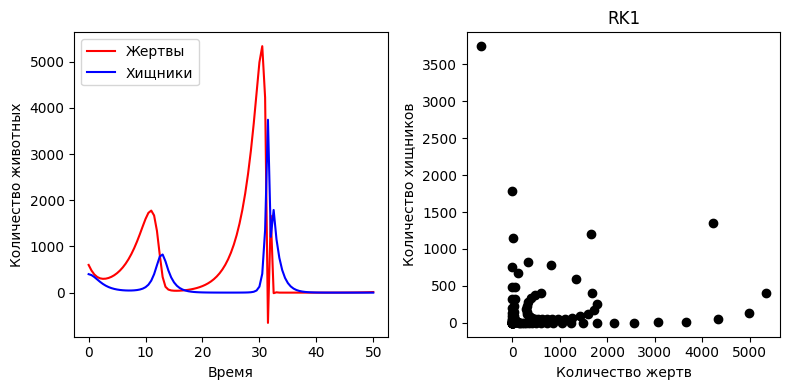

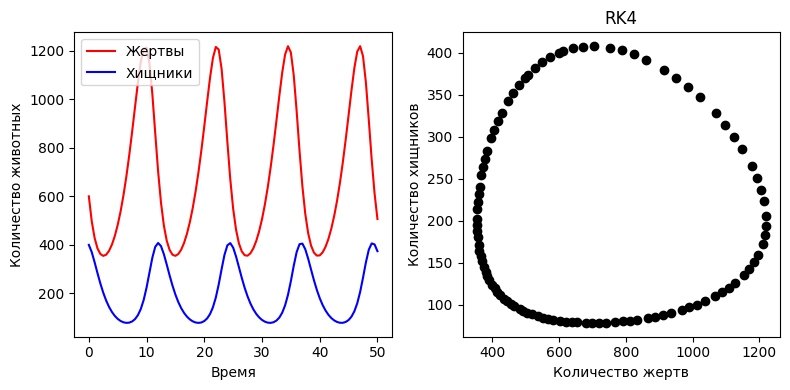


Оценка точности относительно решения odeint:
  RK1  ≈ 4.782e+03
  RK4  ≈ 4.112e-01


<Figure size 640x480 with 0 Axes>

In [37]:
%run lotka_valterra.py

* РК4
порядок точности 4,

ошибки шага маленькие: O(h⁴)

* RK1

Эйлер даёт добавку:

$x_{n+1}=x_n + h f(x_n).$

При быстром росте решения (а здесь рост экспоненциальный на первых этапах!)

→ ошибка шага не просто накапливается, а экспоненциально раздувается.

Порядок точности Эйлера — первый, ошибка O(h).
При h = 0.5 ошибка огромная → решение нестабильно

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. Исследование порядка можно проводить на модельной задаче (не из постановки в задании).

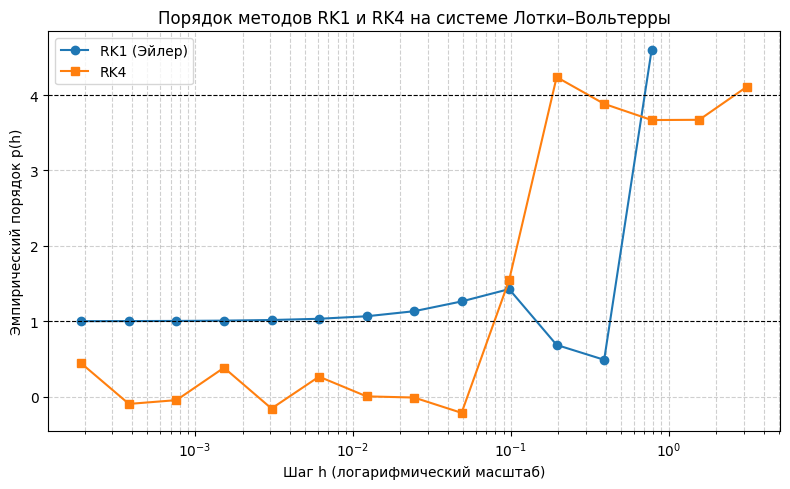

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from lotka_valterra import (
    OdeintLotkaValterraProblem,
    RK1_LotkaValterraProblem,
    RK4_LotkaValterraProblem,
)


def compute_errors_vs_h(
    method_cls,
    hs: np.ndarray,
    a: float, b: float, c: float, d: float,
    x0: float, y0: float,
    T: float,
) -> np.ndarray:
    errs = []
    for h in hs:
        N = int(round(T / h))
        h = T / N
        t = np.linspace(0.0, T, N + 1)

        ode_problem = OdeintLotkaValterraProblem(a, b, c, d, x0, y0, t)
        x_ref, y_ref = ode_problem.solve()

        prob = method_cls(a, b, c, d, x0, y0, t)
        x_num, y_num = prob.solve()

        diff = np.hypot(x_num - x_ref, y_num - y_ref)
        err = np.max(diff)
        errs.append(err)

    return np.asarray(errs)


def empirical_order(hs: np.ndarray, errs: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    Ek = errs[:-1]
    Ek2 = errs[1:]
    p = np.log2(Ek / Ek2)
    h_mid = hs[:-1]
    return h_mid, p


if __name__ == "__main__":
    a, b, c, d = 0.4, 0.002, 0.001, 0.7
    x0, y0 = 600.0, 400.0
    T = 50.0


    ks = np.arange(3, 20) 
    Ns = 2.0 ** ks
    hs = T / Ns

    err_rk1_h = compute_errors_vs_h(
        RK1_LotkaValterraProblem, hs, a, b, c, d, x0, y0, T
    )
    err_rk4_h = compute_errors_vs_h(
        RK4_LotkaValterraProblem, hs, a, b, c, d, x0, y0, T
    )

    h_rk1, p_rk1 = empirical_order(hs, err_rk1_h)
    h_rk4, p_rk4 = empirical_order(hs, err_rk4_h)

    plt.figure(figsize=(8, 5))
    plt.semilogx(h_rk1, p_rk1, "o-", label="RK1 (Эйлер)")
    plt.semilogx(h_rk4, p_rk4, "s-", label="RK4")

    plt.axhline(1.0, color="k", linestyle="--", linewidth=0.8)
    plt.axhline(4.0, color="k", linestyle="--", linewidth=0.8)

    plt.xlabel("Шаг h (логарифмический масштаб)")
    plt.ylabel("Эмпирический порядок p(h)")
    plt.title("Порядок методов RK1 и RK4 на системе Лотки–Вольтерры")
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Анализ:
хрень, система неустойчива и нелинейна, поэтому такая картинка

Попробуем что то по адекватнее:

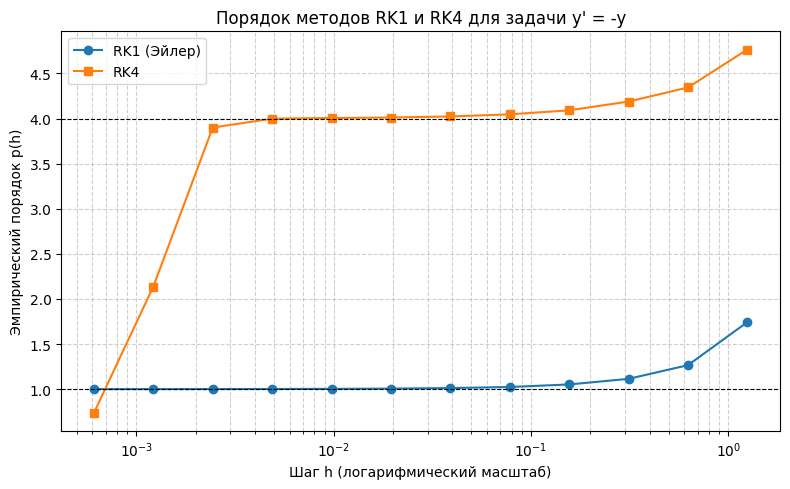

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# y'(t) = -y,  y(0) = 1, solution: y(t) = e^{-t}

def rhs(t, y):
    return -y

def exact_solution(t):
    return np.exp(-t)

def solve_rk1(y0: float, T: float, h: float):
    N = int(round(T / h))
    h = T / N
    t = np.linspace(0.0, T, N + 1)
    y = np.zeros_like(t)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * rhs(t[n], y[n])
    return t, y

def solve_rk4(y0: float, T: float, h: float):
    N = int(round(T / h))
    h = T / N
    t = np.linspace(0.0, T, N + 1)
    y = np.zeros_like(t)
    y[0] = y0
    for n in range(N):
        tn = t[n]
        yn = y[n]

        k1 = rhs(tn, yn)
        k2 = rhs(tn + 0.5*h, yn + 0.5*h*k1)
        k3 = rhs(tn + 0.5*h, yn + 0.5*h*k2)
        k4 = rhs(tn + h,     yn + h*k3)

        y[n+1] = yn + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

def compute_errors_vs_h(method_solver, hs, T: float):
    errs = []
    for h in hs:
        t, y_num = method_solver(1.0, T, h)
        y_exact = exact_solution(t)
        err = np.max(np.abs(y_num - y_exact))
        errs.append(err)
    return np.asarray(errs)

def empirical_order(hs, errs):
    Ek  = errs[:-1]
    Ek2 = errs[1:]
    p = np.log2(Ek / Ek2)
    h_mid = hs[:-1]
    return h_mid, p

T = 5.0   
ks = np.arange(2, 15)
Ns = 2.0**ks
hs = T / Ns

err_rk1 = compute_errors_vs_h(solve_rk1, hs, T)
err_rk4 = compute_errors_vs_h(solve_rk4, hs, T)

h_rk1, p_rk1 = empirical_order(hs, err_rk1)
h_rk4, p_rk4 = empirical_order(hs, err_rk4)

plt.figure(figsize=(8, 5))
plt.semilogx(h_rk1, p_rk1, 'o-', label='RK1 (Эйлер)')
plt.semilogx(h_rk4, p_rk4, 's-', label='RK4')

plt.axhline(1.0, color='k', linestyle='--', linewidth=0.8)
plt.axhline(4.0, color='k', linestyle='--', linewidth=0.8)

plt.xlabel("Шаг h (логарифмический масштаб)")
plt.ylabel("Эмпирический порядок p(h)")
plt.title("Порядок методов RK1 и RK4 для задачи y' = -y")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### Анализ
Все хорошо

Отклонение на маленьких шагах - ощутимое влияние "машинного эпсилон"

Отклонение на больших: $E(h)/E(h/2)$ уже не работает на больших шагах
маленькие шаги - машинный эпсилон